breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0: 1, 1: 0})# Map nesse caso serve para inverter os valores
X.head()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
     GroupKFold,
     LeaveOneGroupOut,
     cross_validate,
     GridSearchCV
)


In [5]:
#Load dataset 
breast_canceer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_canceer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

# Add patients atrribute for the demo
patient_list = [p for p in range(1, 10)]
np.random.seed(42)
X['patient']  = np.random.choice(patient_list, size = len(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,patient
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,7
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,4
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,8
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,5
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,7


In [6]:
#Number of patience
X['patient'].nunique()

9

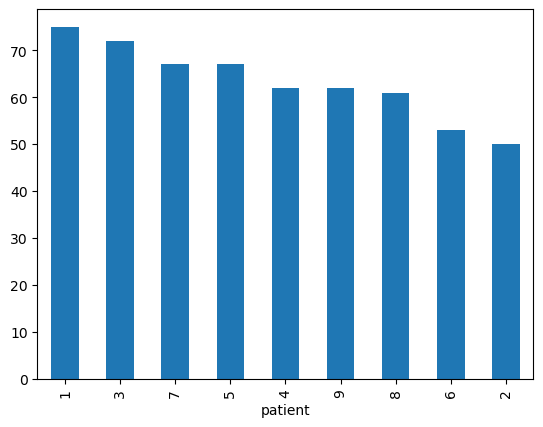

In [7]:
#Observations per patient
X['patient'].value_counts().plot.bar()
plt.show()

In [8]:
#Split the dataset
#ALl patients except 7
X_train = X[X['patient'] != 7]
y_train = y.iloc[X_train.index]

#patient 7
X_test = X[X['patient'] == 7]
y_test = y.iloc[X_test.index]


In [11]:
## Group K-Fold CrossValidation
logit = LogisticRegression(
    penalty = 'l2', C = 10, solver = 'liblinear', random_state = 42, max_iter = 10000)

#GroupKFold Cross-Validation
gkf = GroupKFold(n_splits = 5)

#Estimate generalization error
clf = cross_validate(
    logit, 
    X_train.drop('patient', axis = 1),#tirando a coluna patient
    y_train,
    scoring = 'accuracy',
    cv = gkf.split(X_train.drop('patient', axis = 1), y_train, groups = X_train['patient']),
    return_train_score = True,
)
clf['test_score']

array([0.96      , 1.        , 0.95726496, 0.94308943, 0.95652174])

In [12]:
#Fit the model to entire train set
logit.fit(X_train.drop('patient', axis = 1), y_train)

train_preds = logit.predict(X_train.drop('patient', axis = 1))
test_preds = logit.predict(X_test.drop('patient', axis = 1))

print(f'Train Accuracy: {accuracy_score(y_train, train_preds):.2f}')
print(f'Test Accuracy: {accuracy_score(y_test, test_preds):.2f}')

Train Accuracy: 0.97
Test Accuracy: 0.94


In [13]:
#Cross Validation
logo = LeaveOneGroupOut()

clf = cross_validate(
    logit,
    X.drop('patient', axis = 1),
    y,
    scoring = 'accuracy',
    cv = logo.split(X.drop('patient', axis = 1), y, groups = X['patient']),
    return_train_score = True,
)
clf['test_score']

array([0.96      , 0.94      , 1.        , 0.96774194, 0.98507463,
       0.94339623, 0.94029851, 0.96721311, 0.91935484])

## Hytperparemter tuning with leave ' group out



In [17]:
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parâmetros
param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10, 100],
)

# Instância do modelo
logit = LogisticRegression(solver='liblinear')

# Validação cruzada
logo = LeaveOneGroupOut()

# Verifique os tamanhos e os índices
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Patient groups shape: {X['patient'].shape}")

# Configuração do GridSearchCV
grid = GridSearchCV(
    logit,
    refit=True,
    param_grid=param_grid,
    scoring='accuracy',
    cv=logo.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),  # Use X_train aqui
)

# Ajuste do modelo
search = grid.fit(
    X_train.drop('patient', axis=1),  # Drop coluna 'patient'
    y_train
)

# Resultados
print("Melhores parâmetros:", search.best_params_)


X_train shape: (502, 31)
y_train shape: (502,)
Patient groups shape: (569,)


c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number 

Melhores parâmetros: {'C': 100, 'penalty': 'l1'}


c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\vish8\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
